# Key insights
- AVTOT (Assessed Total Value of property) - first the Full market value (FLVALUE) of the property is estimated by DoF, then assessed value (AVTOT) is calculated as a percentage of FLVALUE - 45% for tax classes 2 and 4; 5-6% for tax class 1. 
- Missing values for FULLVAL, AVTOT and AVLAND - around 13k properties have missing values for all 3; 
    - 5.7k of these are properties with building class R0, which does not represent actual tax lots, but is a wrapper for other individual condo units. 
    - 4.6k of the properties are tax class 3 (utility properties; e.g. gas/electricty/railroads/bridges/tunnels, etc) - most of which are excluded for the purposes of the project anyway (government-owned properties) 
- AVLAND as a percentage of AVTOT:
    - it makes sense that AVLAND < AVTOT (assessed value of land < total assessed value)
    - different tax classes have different distributions but there is no single number (e.g. AVLAND is always x% of AVTOT) which makes sense, as every property is different. 
- AVLAND2, AVTOT2, EXTOT2, etc:
    - these variables are non-zero only for properties with tax class 2 and 4; and almost all the tax class 2 and 4 properties have non-zero values for these variables. 
    - it seems AVLAND2 is same variable as AVLAND, but from a previous year (slight percentage difference) - same for AVTOT2 and EXTOT2

In [1]:
import pandas as pd 
df = pd.read_csv('NY property data.csv')
print(df.shape)
print(df.columns)
# r0 = df[df['BLDGCL'] == 'R0']
# print(r0.shape)
# print(r0['TAXCLASS'].value_counts())

(1070994, 32)
Index(['RECORD', 'BBLE', 'BORO', 'BLOCK', 'LOT', 'EASEMENT', 'OWNER', 'BLDGCL',
       'TAXCLASS', 'LTFRONT', 'LTDEPTH', 'EXT', 'STORIES', 'FULLVAL', 'AVLAND',
       'AVTOT', 'EXLAND', 'EXTOT', 'EXCD1', 'STADDR', 'ZIP', 'EXMPTCL',
       'BLDFRONT', 'BLDDEPTH', 'AVLAND2', 'AVTOT2', 'EXLAND2', 'EXTOT2',
       'EXCD2', 'PERIOD', 'YEAR', 'VALTYPE'],
      dtype='object')


# exploring zero values for FULLVAL, AVTOT, AVLAND

- ran the full dqr file on the filtered dataset, and observed:
- **13,007 records have zero values for all 3** dollar values above.
- There are **4,638** properties in the 1 million dataset with **Tax Class 3 (utilities** - eg bridge, tunnel, highway, public transportation, railroads, gas/electricity, etc) - and almost all of these are present in the filtered dataset (i.e. almost all of them have 0 values for FULLVAL, AVTOT and AVLAND).
- There are 5,696 properties in the full dataset with **Building Class R0** and every single one of them - is present in the filtered dataset - i.e., all 5696 of them have 0 values for FULLVAL, AVTOT and AVLAND. (R0 is **'special condominium billing lot'** - i.e. building which has condos, but the individual condos themselves are considered separate building classes, and probably assessed separately) (and they are in TAX CLASS 2) (perhaps this building class is just a 'wrapper' for the individual condos - which are assessed separately) 
    - Billing BBLs do not represent actual tax lots, and are not lienable. However, billing BBLs do provide a mechanism to obtain the name and address of a more appropriate party than a unit owner to communicate with concerning condominium-wide matters.  (https://nycplanning.github.io/Geosupport-UPG/chapters/chapterVI/section04/#:~:text=To%20distinguish%20condominiums%20from%20their,property%20manager%20or%20an%20attorney.)
- 


# Exploring relationships between FULLVAL and AVTOT - for tax classes 2, 4 and 1. 

- FULLVAL (market value) is calculated first by Department of Finance. 
- Then AVTOT (total assessed value) is calculated as a percentage of FULLVAL. This percentage is different for different taxclasses. (45% for tax classes 2 and 4; 5-6% for tax class 1).
- It seems AVTOT is 45% of FULLVAL for tax class 2 (co-ops, condos, rentals, 4+ units) and 45% for tax class 4 (commercial and industrial properties), and around 5-6% for tax class 1 (1/2/3 family homes).  These 3 tax classes cover 90% of the properties in the dataset.


In [2]:
import pandas as pd 
df = pd.read_csv('NY property data.csv')
print(df.shape)
print(df.columns)

(1070994, 32)
Index(['RECORD', 'BBLE', 'BORO', 'BLOCK', 'LOT', 'EASEMENT', 'OWNER', 'BLDGCL',
       'TAXCLASS', 'LTFRONT', 'LTDEPTH', 'EXT', 'STORIES', 'FULLVAL', 'AVLAND',
       'AVTOT', 'EXLAND', 'EXTOT', 'EXCD1', 'STADDR', 'ZIP', 'EXMPTCL',
       'BLDFRONT', 'BLDDEPTH', 'AVLAND2', 'AVTOT2', 'EXLAND2', 'EXTOT2',
       'EXCD2', 'PERIOD', 'YEAR', 'VALTYPE'],
      dtype='object')


In [3]:
#AVLAND divided by FULLVAL
df['AVLAND/FULLVAL'] = (df['AVLAND']/ df['FULLVAL'])

#AVTOT divided by FULLVAL
df['AVTOT/FULLVAL'] = (df['AVTOT']/ df['FULLVAL'])

#AVLAND divided by AVTOT
df['AVLAND/AVTOT'] = (df['AVLAND']/ df['AVTOT'])


In [4]:
print(df['TAXCLASS'].value_counts())


TAXCLASS
1     660721
2     188612
4     104310
2A     40574
1B     24738
1A     21667
2B     13964
2C     10795
3       4638
1C       946
1D        29
Name: count, dtype: int64


In [5]:
taxclass_1 = df[df['TAXCLASS'] == '1']
taxclass_2 = df[df['TAXCLASS'] == '2']
taxclass_4 = df[df['TAXCLASS'] == '4']

## AVTOT for tax class 4: 45% of FULLVAL

In [6]:
print(taxclass_4['AVTOT/FULLVAL'].mean())
print(taxclass_4['AVTOT/FULLVAL'].min())
print(taxclass_4['AVTOT/FULLVAL'].max())
#print(taxclass_4['AVTOT/FULLVAL'].head(50))

0.44986354153599634
0.0010042612067411943
12.48144593157899


In [7]:
print(taxclass_4.shape)
print(taxclass_4[(taxclass_4['AVTOT/FULLVAL']>.44)& (taxclass_4['AVTOT/FULLVAL']<.46)].shape)

(104310, 35)
(102985, 35)


/opt/homebrew/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Distribution of AVTOT/FULLVAL for Tax Class 4')

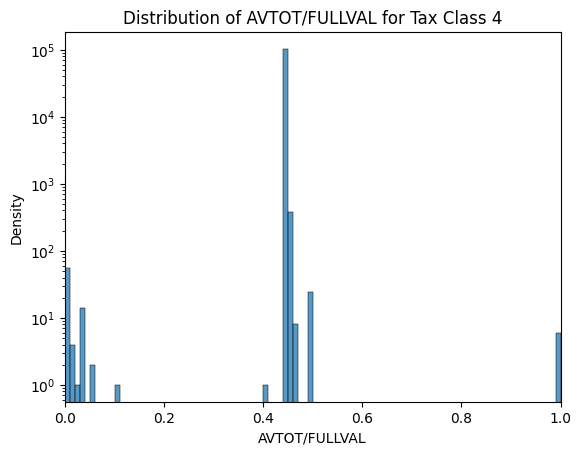

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
xhigh = 1
plt.xlim(0, xhigh)
temp = taxclass_4[taxclass_4['AVTOT/FULLVAL'] <= xhigh]
sns.histplot(temp['AVTOT/FULLVAL'], bins = 100, kde = False)
plt.yscale('log')

plt.xlabel('AVTOT/FULLVAL')
plt.ylabel('Density')
plt.title('Distribution of AVTOT/FULLVAL for Tax Class 4')

## AVTOT for tax class 2: 45% of FULLVAL 

In [9]:
print(taxclass_2['AVTOT/FULLVAL'].mean())
print(taxclass_2['AVTOT/FULLVAL'].min())
print(taxclass_2['AVTOT/FULLVAL'].max())
print(f"Number of properties in tax class 2: {taxclass_2.shape[0]}")
print(f"Number of properties in tax class 2, with AVTOT 44-46% of FULLVAL: {taxclass_2[(taxclass_2['AVTOT/FULLVAL']>44)& (taxclass_2['AVTOT/FULLVAL']<46)].shape[0]}")

0.45001195789902937
0.4052854122621565
1.1020408163265305
Number of properties in tax class 2: 188612
Number of properties in tax class 2, with AVTOT 44-46% of FULLVAL: 0


/var/folders/xx/xzxtm5cd4_qc7z_7jjysft080000gn/T/ipykernel_30248/2405362226.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  temp = temp[taxclass_2['AVTOT/FULLVAL']>= xlow]
/opt/homebrew/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Distribution of AVTOT/FULLVAL for Tax Class 2')

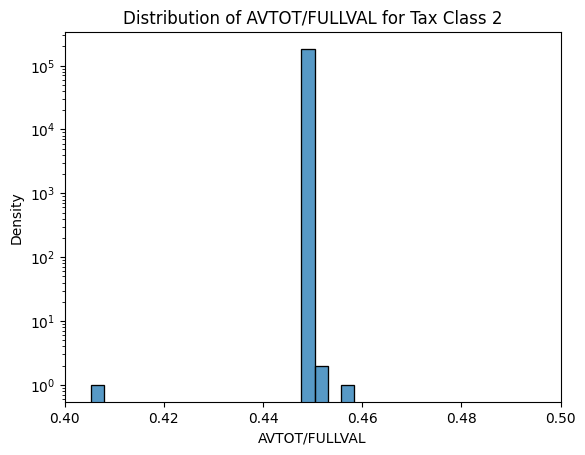

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
xhigh = .5
xlow = .4
plt.xlim(xlow, xhigh)
temp = taxclass_2[taxclass_2['AVTOT/FULLVAL'] <= xhigh]
temp = temp[taxclass_2['AVTOT/FULLVAL']>= xlow]
sns.histplot(temp['AVTOT/FULLVAL'], bins = 20, kde = False)
plt.yscale('log')

plt.xlabel('AVTOT/FULLVAL')
plt.ylabel('Density')
plt.title('Distribution of AVTOT/FULLVAL for Tax Class 2')

## AVTOT for tax class 1: 5-6% of FULLVAL

In [11]:
print(taxclass_1['AVTOT/FULLVAL'].mean())
print(taxclass_1['AVTOT/FULLVAL'].min())
print(taxclass_1['AVTOT/FULLVAL'].max())

print(taxclass_1.shape)
print(taxclass_1[(taxclass_1['AVTOT/FULLVAL']>.04)& (taxclass_1['AVTOT/FULLVAL']<.06)].shape)
#print(taxclass_1[taxclass_1['AVTOT/FULLVAL']==6].shape)

0.04636418961998775
0.0008130081300813008
0.06921686746987951
(660721, 35)
(442104, 35)


/opt/homebrew/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Distribution of AVTOT/FULLVAL for Tax Class 1')

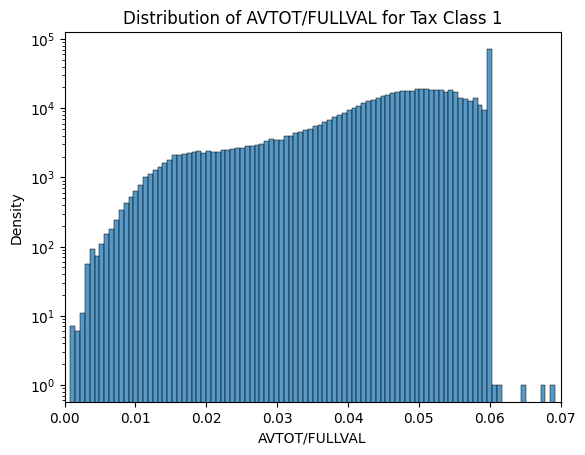

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

xhigh = .07
plt.xlim(0, xhigh)
temp = taxclass_1[taxclass_1['AVTOT/FULLVAL'] <= xhigh]
sns.histplot(temp['AVTOT/FULLVAL'], bins = 100, kde = False)
plt.yscale('log')

plt.xlabel('AVTOT/FULLVAL')
plt.ylabel('Density')
plt.title('Distribution of AVTOT/FULLVAL for Tax Class 1')

# Relationship between AVTOT and AVLAND 

- distributions of AVLAND as a percentage of AVTOT
- each tax class has a separate type of distribution.
- none of the tax classes have a specific number (eg 'AVLAND is always 50% of AVTOT for tax class 4'), but they do have interesting distributions which suggest a possible relationship might exist between AVLAND and AVTOT for each tax class. 

/opt/homebrew/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Distribution of AVLAND/AVTOT for Tax Class ALL')

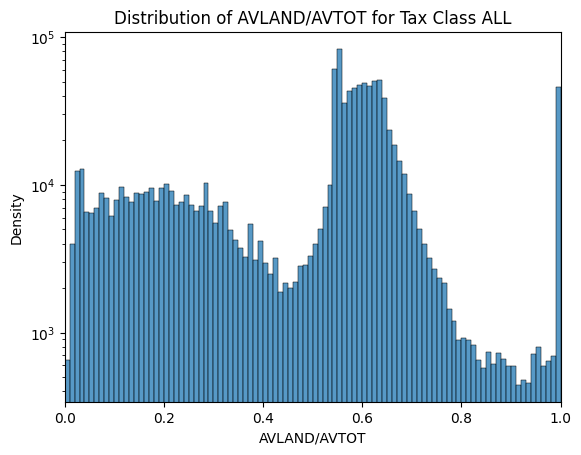

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

xhigh = 1
plt.xlim(0, xhigh)
temp = df[df['AVLAND/AVTOT'] <= xhigh]
sns.histplot(temp['AVLAND/AVTOT'], bins = 100, kde = False)
plt.yscale('log')

plt.xlabel('AVLAND/AVTOT')
plt.ylabel('Density')
plt.title('Distribution of AVLAND/AVTOT for Tax Class ALL')

/opt/homebrew/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Distribution of AVLAND/AVTOT for Tax Class 4')

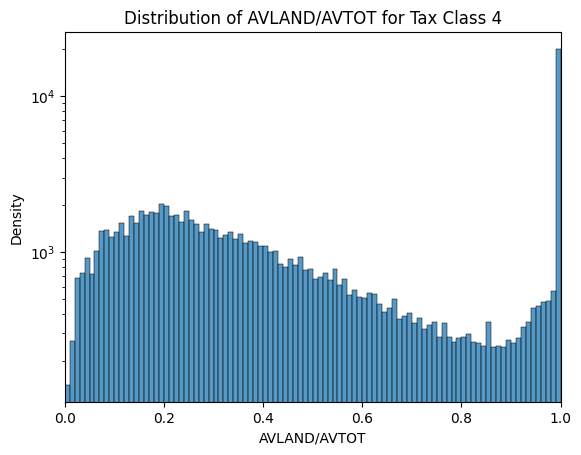

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

xhigh = 1
plt.xlim(0, xhigh)
temp = taxclass_4[taxclass_4['AVLAND/AVTOT'] <= xhigh]
sns.histplot(temp['AVLAND/AVTOT'], bins = 100, kde = False)
plt.yscale('log')

plt.xlabel('AVLAND/AVTOT')
plt.ylabel('Density')
plt.title('Distribution of AVLAND/AVTOT for Tax Class 4')

/opt/homebrew/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Distribution of AVLAND/AVTOT for Tax Class 2')

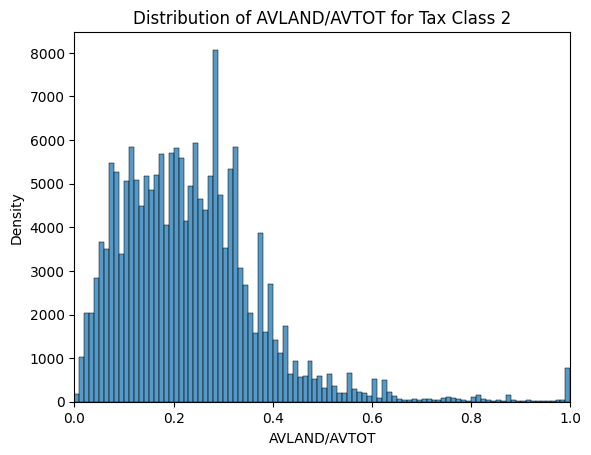

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

xhigh = 1
plt.xlim(0, xhigh)
temp = taxclass_2[taxclass_2['AVLAND/AVTOT'] <= xhigh]
sns.histplot(temp['AVLAND/AVTOT'], bins = 100, kde = False)


plt.xlabel('AVLAND/AVTOT')
plt.ylabel('Density')
plt.title('Distribution of AVLAND/AVTOT for Tax Class 2')

/opt/homebrew/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Distribution of AVLAND/AVTOT for Tax Class 1')

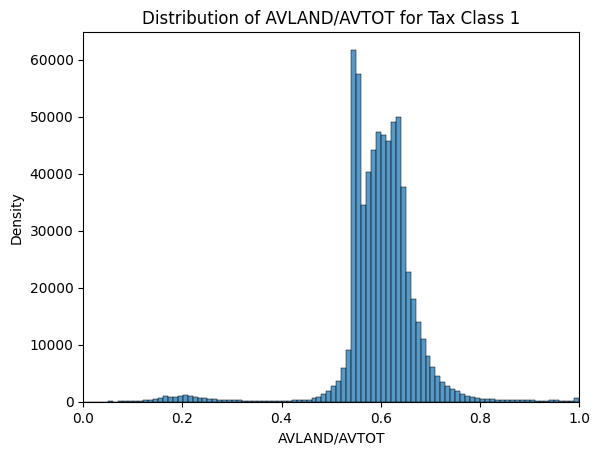

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

xhigh = 1
plt.xlim(0, xhigh)
temp = taxclass_1[taxclass_1['AVLAND/AVTOT'] <= xhigh]
sns.histplot(temp['AVLAND/AVTOT'], bins = 100, kde = False)


plt.xlabel('AVLAND/AVTOT')
plt.ylabel('Density')
plt.title('Distribution of AVLAND/AVTOT for Tax Class 1')

# AVLAND2, AVTOT2 - around 26% of the properties have these values

- it seems that AVLAND2 and AVTOT2 are non-zero/non-null only for tax classes 2 and 4; and almost all the tax class 2 and 4 properties have non-zero/non-null values for these 2 fields. 
- filtered dataset to have records which are not null/zero for AVLAND2, AVTOT2, etc. 
- for the full dataset, there are 11 unique taxclasses; but for the filtered dataset, there are only 2 unique taxclasses - 2 and 4.  
- There are 293k properties in the full dataset with taxclasses 2 and 4. and 283k of them are included in this filtered dataset, so it looks like only the taxclasses 2 and 4 have values for the AVLAND2, AVTOT2, EXLAND2 and EXTOT2 variables.   
- tax class 2 – Co-ops, condos, rentals, 4+ units  
- Tax Class 4 – Commercial and industrial properties
- from observation, it seems that (AVLAND and AVLAND2), and (AVTOT and AVTOT2) are the same values, just from a previous year, as AVLAND is around 15% different on average from AVLAND2, and same for AVTOT and AVTOT2. same for (EXTOT and EXTOT2) pair; both appear to be same values but from previous year (slight differences)
- so if AVLAND, AVTOT or EXTOT are missing or zero, impute their values based on AVLAND2, AVTOT2, or EXTOT2, and vice versa. 

In [17]:
df2 = df[df['AVTOT2'].notna()]
print(df2.shape)

(282732, 35)


In [18]:
#percent difference in AVTOT from AVTOT2 
df2['avtot_diff'] = ((df2['AVTOT'] - df2['AVTOT2'])/df2['AVTOT2'])*100 

/var/folders/xx/xzxtm5cd4_qc7z_7jjysft080000gn/T/ipykernel_30248/121053854.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['avtot_diff'] = ((df2['AVTOT'] - df2['AVTOT2'])/df2['AVTOT2'])*100


In [19]:
print(df2[(df2['avtot_diff'] > -15) & (df2['avtot_diff'] < 15)].shape)

(183741, 36)


In [20]:
df2['avland_diff'] = ((df2['AVLAND'] - df2['AVLAND2'])/df2['AVLAND2'])*100 #percent difference in AVTOT from AVTOT2 
print(df2[(df2['avland_diff'] > -15) & (df2['avland_diff'] < 15)].shape)

(220425, 37)


/var/folders/xx/xzxtm5cd4_qc7z_7jjysft080000gn/T/ipykernel_30248/695158358.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['avland_diff'] = ((df2['AVLAND'] - df2['AVLAND2'])/df2['AVLAND2'])*100 #percent difference in AVTOT from AVTOT2


# calculate tax owed (assessed value minus exemptions)

- subtract exemptions from assessed value, and multiply by appropriate tax rate for the tax class it is in.

In [21]:
df['exemption'] = df['EXTOT']
print((df['exemption'] == 0).sum())

# set exemption to EXTOT if it's not null or zero, else set it to EXTOT2
df['exemption'] = df.apply(lambda row: row['EXTOT'] if pd.notnull(row['EXTOT']) and row['EXTOT'] != 0 else row['EXTOT2'], axis=1)
print(df['exemption'].isna().sum())

df['exemption'] = df['exemption'].fillna(0)
print(df['exemption'].isna().sum())


432572
432506
0


In [22]:
df['taxable_value'] = df['AVTOT'] - df['exemption']
df['taxable_value'].mean()

136047.220265473

In [23]:
import pandas as pd

# Assuming your DataFrame 'df' already exists

def calculate_tax(row):
    tax_class = row['TAXCLASS']
    taxable_value = row['taxable_value']
    if tax_class in ['1', '1A', '1B', '1C', '1D']:
        return taxable_value * 0.20085
    elif tax_class in ['2', '2A', '2B', '2C']:
        return taxable_value * 0.125
    elif tax_class == '3':
        return taxable_value * 0.11181
    elif tax_class == '4':
        return taxable_value * 0.10762
    else:
        return None  # Or handle other TAXCLASS values as needed

df['tax_owed'] = df.apply(calculate_tax, axis=1)

# Now the DataFrame 'df' has a new column called 'tax_owed'
print(df['tax_owed'].mean())

16844.26013172366


In [24]:
taxclass_1 = df[df['TAXCLASS'].isin(['1', '1A', '1B', '1C', '1D'])].copy()
taxclass_2 = df[df['TAXCLASS'].isin(['2', '2A', '2B', '2C'])].copy()
taxclass_3 = df[df['TAXCLASS'] == '3'].copy()
taxclass_4 = df[df['TAXCLASS'] == '4'].copy()

#print(taxclass_1.columns)


In [25]:
print(taxclass_1['tax_owed'].mean())
print(taxclass_2['tax_owed'].mean())
print(taxclass_3['tax_owed'].mean())
print(taxclass_4['tax_owed'].mean())


4241.282800570188
27336.240183405855
15.220214598965073
77603.9961501141


/opt/homebrew/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Distribution of tax_owed for Tax Class 1')

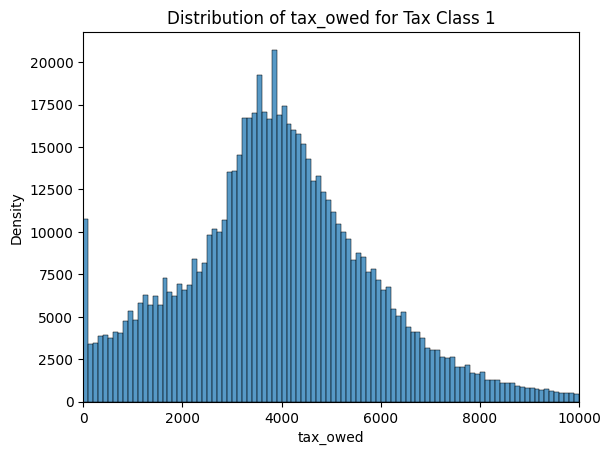

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

xhigh = 10000
plt.xlim(0, xhigh)
temp = taxclass_1[taxclass_1['tax_owed'] <= xhigh]
sns.histplot(temp['tax_owed'], bins = 100, kde = False)


plt.xlabel('tax_owed')
plt.ylabel('Density')
plt.title('Distribution of tax_owed for Tax Class 1')

/opt/homebrew/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Distribution of tax_owed for Tax Class 2')

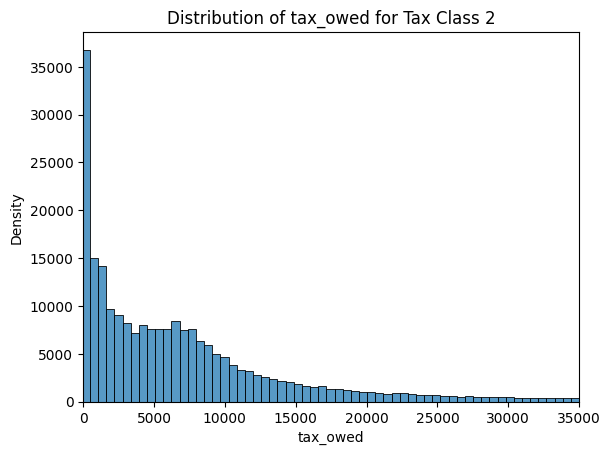

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

xhigh = 35_000
plt.xlim(0, xhigh)
temp = taxclass_2[taxclass_2['tax_owed'] <= xhigh]
sns.histplot(temp['tax_owed'], bins = 100, kde = False)


plt.xlabel('tax_owed')
plt.ylabel('Density')
plt.title('Distribution of tax_owed for Tax Class 2')

/opt/homebrew/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Distribution of tax_owed for Tax Class 3')

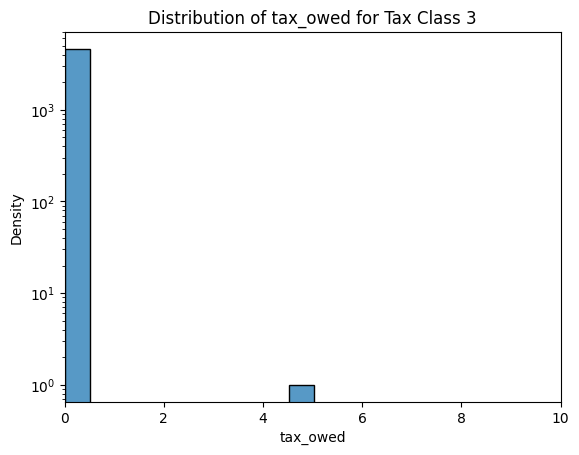

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

xhigh = 10
plt.xlim(0, xhigh)
temp = taxclass_3[taxclass_3['tax_owed'] <= xhigh]
sns.histplot(temp['tax_owed'], bins = 10, kde = False)
plt.yscale('log')

plt.xlabel('tax_owed')
plt.ylabel('Density')
plt.title('Distribution of tax_owed for Tax Class 3')

/opt/homebrew/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Distribution of tax_owed for Tax Class 4')

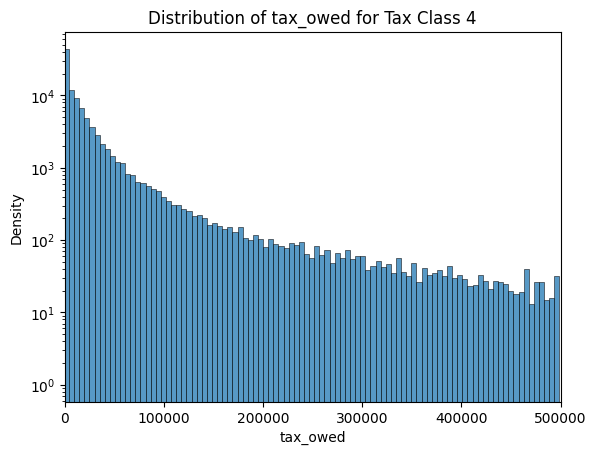

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

xhigh = 500_000
plt.xlim(0, xhigh)
temp = taxclass_4[taxclass_4['tax_owed'] <= xhigh]
sns.histplot(temp['tax_owed'], bins = 100, kde = False)

plt.yscale('log')
plt.xlabel('tax_owed')
plt.ylabel('Density')
plt.title('Distribution of tax_owed for Tax Class 4')